In [1]:
from collections import defaultdict as dt
file=open("../dblp.txt",encoding="utf-8")
nei=dt(set)
for i in file:
    i=i.replace("\n","")
    if len(i)<=2:
        continue
    if i[1]=="@":
        d=0
        z=i[2:].split(",")
        for j in range(len(z)-1):
            for k in range(j+1,len(z)):
                if z[k].strip().upper()!=z[j].strip().upper() and z[k].strip()!='' and z[j].strip()!='':
                    nei[z[j].strip().upper()].add(z[k].strip().upper())
                    nei[z[k].strip().upper()].add(z[j].strip().upper())
        

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
new_keys=set(sorted(nei.keys(),reverse=True,key=lambda i:len(nei[i]))[:10])

new_di={j:nei[j].intersection(new_keys) for j in new_keys}


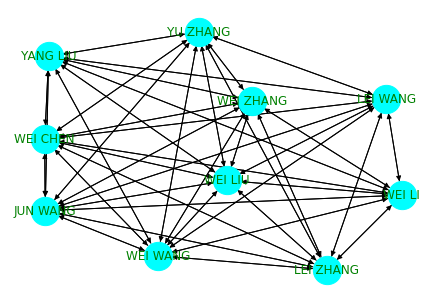

In [3]:
g = nx.DiGraph(new_di)
nx.draw(g,with_labels=True,node_size=800,node_color='cyan',font_color='green')
plt.savefig("Network.png",dpi=1000)

In [4]:
from math import log
def jacard(x,y):
    return len(nei[x].intersection(nei[y]))/len(nei[x].union(nei[y]))
def aac(x,y):
    return sum(1/log(len(nei[z]),10) for z in nei[x].intersection(nei[y]))
def predict(x):
    res1=set()
    res2=set()
    for y in nei[x]:
        for z in nei[y]:
            if z not in nei[x] and z!=x:
                
                res1.add((jacard(x,z),z))
                res2.add((aac(x,z),z))
    res1=list(res1)
    res2=list(res2)
    res1.sort(reverse=True)
    res2.sort(reverse=True)
    return res1[:min(5,len(res1))],res2[:min(5,len(res2))]



In [5]:
authors=list(nei.keys())
file1=open("jacard_predictions.csv",'w',encoding="utf-8")
file2=open("aac_predictions.csv",'w',encoding="utf-8")
file1.write("author,co_author,jac\n")
file2.write("author,co_author,aac\n")
import random
for i in random.sample(range(0, len(authors)), 10000):
    z=authors[i]
    x,y= predict(z)
    for a,b in x:
        file1.write(z+","+b+","+str(a)+"\n")
    for a,b in y:
        file2.write(z+","+b+","+str(a)+"\n")